# Text Classification

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import SpaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

# Creating Pandas Dataframe

In [2]:
data = pd.read_csv("~/Downloads/mtsamples.csv", skipinitialspace = True)
data

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow up...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


# High-Level Review of Data Structure

In [3]:
display(data.shape)
data.head()

(4999, 6)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4993 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3850 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [5]:
data.describe()

,Unnamed: 0
count,4999.000000
mean,2499.000000
std,1443.231328
min,0.000000
25%,1249.500000
50%,2499.000000
75%,3748.500000
max,4998.000000


In [6]:
data.describe(include = object)

,description,medical_specialty,sample_name,transcription,keywords
count,4993,4999,4999,4966,3850
unique,2347,40,2377,2357,3848
top,An example/template for a routine normal male ...,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",gastroenterology
freq,12,1103,5,5,2


In [7]:
data.isnull().sum()

Unnamed: 0              0
description             6
medical_specialty       0
sample_name             0
transcription          33
keywords             1149
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data["medical_specialty"].value_counts()/data.shape[0]

Surgery                          0.220644
Consult - History and Phy.       0.103221
Cardiovascular / Pulmonary       0.074415
Orthopedic                       0.071014
Radiology                        0.054611
General Medicine                 0.051810
Gastroenterology                 0.046009
Neurology                        0.044609
SOAP / Chart / Progress Notes    0.033207
Obstetrics / Gynecology          0.032006
Urology                          0.031606
Discharge Summary                0.021604
ENT - Otolaryngology             0.019604
Neurosurgery                     0.018804
Hematology - Oncology            0.018004
Ophthalmology                    0.016603
Nephrology                       0.016203
Emergency Room Reports           0.015003
Pediatrics - Neonatal            0.014003
Pain Management                  0.012402
Psychiatry / Psychology          0.010602
Office Notes                     0.010202
Podiatry                         0.009402
Dermatology                      0

# Data Preparation

- I now have a general impression of the data and developed strategies for feature engineering.
- I have reviewed all of the feature names and I concur with their data types
- I have 4999 samples and 6 features.
- Of the 6 features, 1 is numeric and the remaining 5 are categorical.
- There are 33 missing values in the transcription feature and 1068 missing values in the keyword section. I will recheck these missing values after I subset the data to Cardiovascular/Pulmonary, Neurology, and Orthopedic and remove the missing entries.
- There are no duplicate entries
- The unnamed:0, sample name, description, and keywords features are redundant features and will be removed.

In [10]:
data = data[data['transcription'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4966 non-null   int64 
 1   description        4960 non-null   object
 2   medical_specialty  4966 non-null   object
 3   sample_name        4966 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3817 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.6+ KB


In [11]:
data = data.drop(['Unnamed: 0', 'description', 'sample_name', 'keywords'], axis = 1)
data.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


In [12]:
print(data.columns)

Index(['medical_specialty', 'transcription'], dtype='object')


In [13]:
data_subset = data[(data['medical_specialty'] == 'Cardiovascular / Pulmonary') | (data['medical_specialty'] == 'Neurology') | (data['medical_specialty'] == 'Orthopedic')]
data_subset

,medical_specialty,transcription
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
7,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
9,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size...."
11,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc..."
...,...,...
4972,Cardiovascular / Pulmonary,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden..."
4973,Cardiovascular / Pulmonary,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES..."
4974,Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS: , The patient is a..."
4975,Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-..."


In [14]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 3 to 4976
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  949 non-null    object
 1   transcription      949 non-null    object
dtypes: object(2)
memory usage: 22.2+ KB


In [15]:
data_subset.isnull().sum()

medical_specialty    0
transcription        0
dtype: int64

In [16]:
data_subset.describe(include = object)

,medical_specialty,transcription
count,949,949
unique,3,912
top,Cardiovascular / Pulmonary,"CC: ,Low Back Pain (LBP) with associated BLE w..."
freq,371,2


In [17]:
data_subset["medical_specialty"].value_counts()/data_subset.shape[0]

Cardiovascular / Pulmonary    0.390938
Orthopedic                    0.374078
Neurology                     0.234984
Name: medical_specialty, dtype: float64

- The resultant dataframe has been reduced to 2 features (medical_specialty & transcription). 
- There is no missing or duplicated data.
- The medical specialty will be the target variable of interest and the transcription feature will be the predictor variable.
- The remaining 3 medical specialties to not demonstrate any marked imbalances

# Text Cleaning & Pre-Processing

The following four examples demonstrate that the text apears clean (no extraneous text or code such as "break"). Therefore, I will now pre-process the text by normalizing it.

In [18]:
data_subset.iloc[0,1]

'2-D M-MODE: , ,1.  Left atrial enlargement with left atrial diameter of 4.7 cm.,2.  Normal size right and left ventricle.,3.  Normal LV systolic function with left ventricular ejection fraction of 51%.,4.  Normal LV diastolic function.,5.  No pericardial effusion.,6.  Normal morphology of aortic valve, mitral valve, tricuspid valve, and pulmonary valve.,7.  PA systolic pressure is 36 mmHg.,DOPPLER: , ,1.  Mild mitral and tricuspid regurgitation.,2.  Trace aortic and pulmonary regurgitation.'

In [19]:
data_subset.iloc[1,1]

'1.  The left ventricular cavity size and wall thickness appear normal.  The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%.  There is near-cavity obliteration seen.  There also appears to be increased left ventricular outflow tract gradient at the mid cavity level consistent with hyperdynamic left ventricular systolic function.  There is abnormal left ventricular relaxation pattern seen as well as elevated left atrial pressures seen by Doppler examination.,2.  The left atrium appears mildly dilated.,3.  The right atrium and right ventricle appear normal.,4.  The aortic root appears normal.,5.  The aortic valve appears calcified with mild aortic valve stenosis, calculated aortic valve area is 1.3 cm square with a maximum instantaneous gradient of 34 and a mean gradient of 19 mm.,6.  There is mitral annular calcification extending to leaflets and supportive structures with thickening of mitral valve leaflets with mi

In [20]:
data_subset.iloc[2,1]

'2-D ECHOCARDIOGRAM,Multiple views of the heart and great vessels reveal normal intracardiac and great vessel relationships.  Cardiac function is normal.  There is no significant chamber enlargement or hypertrophy.  There is no pericardial effusion or vegetations seen.  Doppler interrogation, including color flow imaging, reveals systemic venous return to the right atrium with normal tricuspid inflow.  Pulmonary outflow is normal at the valve.  Pulmonary venous return is to the left atrium.  The interatrial septum is intact.  Mitral inflow and ascending aorta flow are normal.  The aortic valve is trileaflet.  The coronary arteries appear to be normal in their origins.  The aortic arch is left-sided and patent with normal descending aorta pulsatility.'

In [21]:
data_subset.iloc[3,1]

'DESCRIPTION:,1.  Normal cardiac chambers size.,2.  Normal left ventricular size.,3.  Normal LV systolic function.  Ejection fraction estimated around 60%.,4.  Aortic valve seen with good motion.,5.  Mitral valve seen with good motion.,6.  Tricuspid valve seen with good motion.,7.  No pericardial effusion or intracardiac masses.,DOPPLER:,1.  Trace mitral regurgitation.,2.  Trace tricuspid regurgitation.,IMPRESSION:,1.  Normal LV systolic function.,2.  Ejection fraction estimated around 60%.,'

# Text Normalization
I will perform the following steps to normalize all of the text:
- Apply Lowercase
- Remove Stop Words
- Remove Numbers and Punctuation
- Transcription Tokenization
- Stemming

## Lowercasing

In [22]:
def lowercase(data_subset, y):
    data_subset.loc[:,y] = data_subset[y].apply(lambda x : str.lower(x))
    return data_subset
data_subset = lowercase(data_subset,'transcription')
data_subset.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,medical_specialty,transcription
3,Cardiovascular / Pulmonary,"2-d m-mode: , ,1. left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. the left ventricular cavity size and wall ...
7,Cardiovascular / Pulmonary,"2-d echocardiogram,multiple views of the heart..."
9,Cardiovascular / Pulmonary,"description:,1. normal cardiac chambers size...."
11,Cardiovascular / Pulmonary,"2-d study,1. mild aortic stenosis, widely calc..."


## Removal of Numbers and Punctuation

In [23]:
def punctuation_number_removal(data_subset, y):
    data_subset.loc[:,y] = data_subset[y].apply(lambda x : " ".join(re.findall('[\w]+',x)))
    data_subset[y] = data_subset[y].str.replace('\d+', '')
    return data_subset
data_subset =punctuation_number_removal(data_subset, 'transcription')
data_subset.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
<ipython-input-23-c7a23b27c01c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_subset[y] = data_subset[y].str.replace('\d+', '')
<ipython-input-23-c7a23b27c01c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[y] = data_subset[y].str.replace('\d+', '')


,medical_specialty,transcription
3,Cardiovascular / Pulmonary,d m mode left atrial enlargement with left a...
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...
7,Cardiovascular / Pulmonary,d echocardiogram multiple views of the heart ...
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcifie...


## Tokenization

In [24]:
t =SpaceTokenizer()
def tokenise(data_subset, y):
    data_subset['token'] = data_subset.apply(lambda row: t.tokenize(str(row[y])), axis=1)
    return data_subset
data_subset =tokenise(data_subset, 'transcription')
data_subset.head()

<ipython-input-24-7111eedf884f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['token'] = data_subset.apply(lambda row: t.tokenize(str(row[y])), axis=1)


,medical_specialty,transcription,token
3,Cardiovascular / Pulmonary,d m mode left atrial enlargement with left a...,"[, d, m, mode, , left, atrial, enlargement, wi..."
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[, the, left, ventricular, cavity, size, and, ..."
7,Cardiovascular / Pulmonary,d echocardiogram multiple views of the heart ...,"[, d, echocardiogram, multiple, views, of, the..."
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...,"[description, , normal, cardiac, chambers, siz..."
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcifie...,"[, d, study, , mild, aortic, stenosis, widely,..."


## Stemming

In [25]:
def stem(data_subset, y):
    # Use English stemmer.
    stem = PorterStemmer()
    data_subset['stem'] = data_subset[y].apply(lambda x: [stem.stem(y) for y in x])
    return data_subset
data_subset =stem(data_subset, 'token')
data_subset.head()

<ipython-input-25-03a07f5da2f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['stem'] = data_subset[y].apply(lambda x: [stem.stem(y) for y in x])


,medical_specialty,transcription,token,stem
3,Cardiovascular / Pulmonary,d m mode left atrial enlargement with left a...,"[, d, m, mode, , left, atrial, enlargement, wi...","[, d, m, mode, , left, atrial, enlarg, with, l..."
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[, the, left, ventricular, cavity, size, and, ...","[, the, left, ventricular, caviti, size, and, ..."
7,Cardiovascular / Pulmonary,d echocardiogram multiple views of the heart ...,"[, d, echocardiogram, multiple, views, of, the...","[, d, echocardiogram, multipl, view, of, the, ..."
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...,"[description, , normal, cardiac, chambers, siz...","[descript, , normal, cardiac, chamber, size, ,..."
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcifie...,"[, d, study, , mild, aortic, stenosis, widely,...","[, d, studi, , mild, aortic, stenosi, wide, ca..."


## Stopword Removal

In [26]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
def remove_stop(data_subset, y):
    stop = stopwords.words('english')
    data_subset['stem_no_stop'] = data_subset[y].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
    return data_subset
data_subset = remove_stop(data_subset, 'stem')
data_subset.head()

<ipython-input-27-08ba20c032ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['stem_no_stop'] = data_subset[y].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))


,medical_specialty,transcription,token,stem,stem_no_stop
3,Cardiovascular / Pulmonary,d m mode left atrial enlargement with left a...,"[, d, m, mode, , left, atrial, enlargement, wi...","[, d, m, mode, , left, atrial, enlarg, with, l...",mode left atrial enlarg left atrial diamet ...
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[, the, left, ventricular, cavity, size, and, ...","[, the, left, ventricular, caviti, size, and, ...",left ventricular caviti size wall thick appea...
7,Cardiovascular / Pulmonary,d echocardiogram multiple views of the heart ...,"[, d, echocardiogram, multiple, views, of, the...","[, d, echocardiogram, multipl, view, of, the, ...",echocardiogram multipl view heart great vesse...
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...,"[description, , normal, cardiac, chambers, siz...","[descript, , normal, cardiac, chamber, size, ,...",descript normal cardiac chamber size normal ...
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcifie...,"[, d, study, , mild, aortic, stenosis, widely,...","[, d, studi, , mild, aortic, stenosi, wide, ca...",studi mild aortic stenosi wide calcifi minim...


## Processed Finalized Dataframe

In [28]:
data_subset =data_subset.drop(['transcription','token', 'stem'], axis=1)
data_subset

,medical_specialty,stem_no_stop
3,Cardiovascular / Pulmonary,mode left atrial enlarg left atrial diamet ...
4,Cardiovascular / Pulmonary,left ventricular caviti size wall thick appea...
7,Cardiovascular / Pulmonary,echocardiogram multipl view heart great vesse...
9,Cardiovascular / Pulmonary,descript normal cardiac chamber size normal ...
11,Cardiovascular / Pulmonary,studi mild aortic stenosi wide calcifi minim...
...,...,...
4972,Cardiovascular / Pulmonary,indic chest pain type test adenosin nuclear sc...
4973,Cardiovascular / Pulmonary,chief complaint chest pain histori present ill...
4974,Cardiovascular / Pulmonary,histori present ill patient year old woman fo...
4975,Cardiovascular / Pulmonary,histori present ill mr abc year old gentleman...


# Modeling

## Train/Test Set Creation

In [29]:
Y = data_subset.medical_specialty
X = data_subset.stem_no_stop
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)
print("original data: ", X.shape, Y.shape)
print("training set: ", X_train.shape, Y_train.shape)
print("testing set: ", X_test.shape, Y_test.shape)

original data:  (949,) (949,)
training set:  (711,) (711,)
testing set:  (238,) (238,)


## Feature Extraction & Testing Data Transformation

In [30]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(711, 8750) (238, 8750)


- I have extracted 8750 features from the training sample using standard hyperparameter settings and have used this feature extraction to transform the test sample.

## Train 2 Classifiers

In [31]:
nb = MultinomialNB()
nb_estimator = nb.fit(X_train_dtm, Y_train)
y_pred_class = nb.predict(X_test_dtm)

In [32]:
cnb = ComplementNB() 
cnb_estimator = cnb.fit(X_train_dtm, Y_train)
y_pred_class2 = cnb.predict(X_test_dtm)

## Evaluate Classifier Performance

In [33]:
print("Mutionomial NB Accuracy: ", accuracy_score(Y_test, y_pred_class))
print("Complement NB Accuracy: ", accuracy_score(Y_test, y_pred_class2))

Mutionomial NB Accuracy:  0.8739495798319328
Complement NB Accuracy:  0.8991596638655462


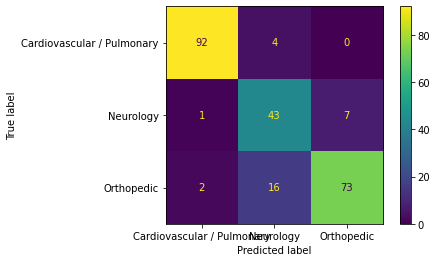

In [34]:
ConfusionMatrixDisplay.from_estimator(nb_estimator, X_test_dtm, Y_test)

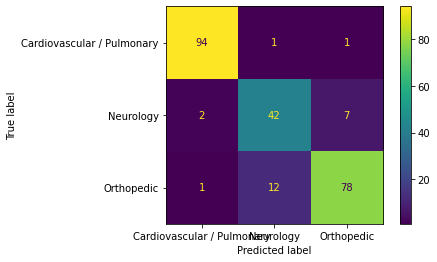

In [35]:
ConfusionMatrixDisplay.from_estimator(cnb_estimator, X_test_dtm, Y_test)

# Interpreting the Results

- Both of the classifiers yielded similar accuracy; however, The complement NB results were superior at nearly 90% vs. the multinomial NB at 87.3%.
- Reviewing the confusion matrices, it is evident that the orthopedic and cardiovascular/pulmonary medical specialties demonstrated higher precision via complement NB, whereas neurology noted higher precision via multinomial NB.

# Unsupervised Clustering

In [36]:
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8)
cv_matrix = cv.fit_transform(data_subset.stem_no_stop)
cv_matrix.shape

(949, 5234)

- I have used the same preprocessed dataset from the first part of the assignment.
- I have used the unigrams and bigrams, combined with TF_IDF to extract 5234 features from all of the available transcription data. No training or testing samples were created.

In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(max_iter=10000, n_clusters=3, n_init=50, random_state=42)

- Here I used KMeans clustering to find the 3 nearest data points to identify the cluster that the datapoint will be assigned to.

In [38]:
from collections import Counter

Counter(km.labels_)

Counter({1: 727, 0: 175, 2: 47})

- The clustering appears to be imbalanced from the true distribution of the each of the medical specialties.

In [39]:
data_subset['kmeans_cluster'] = km.labels_
data_subset.head(100)

,medical_specialty,stem_no_stop,kmeans_cluster
3,Cardiovascular / Pulmonary,mode left atrial enlarg left atrial diamet ...,1
4,Cardiovascular / Pulmonary,left ventricular caviti size wall thick appea...,1
7,Cardiovascular / Pulmonary,echocardiogram multipl view heart great vesse...,1
9,Cardiovascular / Pulmonary,descript normal cardiac chamber size normal ...,1
11,Cardiovascular / Pulmonary,studi mild aortic stenosi wide calcifi minim...,1
...,...,...,...
2100,Orthopedic,preoper diagnos open displac infect left atrop...,0
2101,Orthopedic,titl oper open reduct intern fixat orif irrig...,0
2102,Orthopedic,xyz c evergreen place suit east orang nj,1
2103,Orthopedic,preoper diagnosi left distal radiu fractur met...,1


/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all point

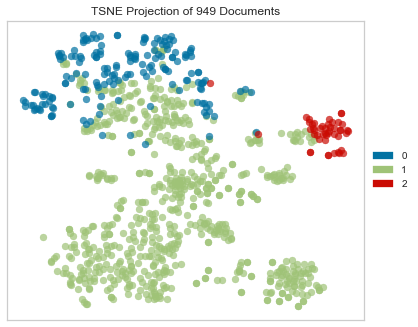

<AxesSubplot:title={'center':'TSNE Projection of 949 Documents'}>

In [40]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(cv_matrix, km.labels_)
tsne.poof()

- The TSNE projection above demonstrates that the majority of the clustering has been centered around the cardiovascular/pulmonary medical specialty, followed by orthopedic, and then neurology.